In [412]:
import pandas as pd

# Gas Dataset load and data prep

In [413]:
df = pd.read_csv (r'..\\DataSet\\2004-2021.tsv', sep = '\t')
isGas = df['PRODUTO']=="GASOLINA COMUM"
df_gas = df[isGas]

# Retirando colunas desnecessárias.
df_gas = df_gas.drop(['PREÇO MÉDIO DISTRIBUIÇÃO',
                      'DESVIO PADRÃO DISTRIBUIÇÃO',
                      'PREÇO MÍNIMO DISTRIBUIÇÃO',
                      'PREÇO MÁXIMO DISTRIBUIÇÃO',
                      'COEF DE VARIAÇÃO DISTRIBUIÇÃO',
                      'DATA FINAL',
                      'PRODUTO',
                      'ESTADO'], axis=1)

# Renomeando colunas para o padrão correto.
df_gas.rename(columns = {
    'NÚMERO DE POSTOS PESQUISADOS':'gas_stations_searched',
    'PREÇO MÉDIO REVENDA':'avg_price',
    'DATA INICIAL':'initial_date',
    'REGIÃO':'region',
    'MES':'month',
    'ANO':'year'
}, inplace = True)

df_gas['initial_date'] = pd.to_datetime(df_gas['initial_date'], format='%Y-%m-%d')
df_gas['month'] = pd.DatetimeIndex(df_gas['initial_date']).month
df_gas['year'] = pd.DatetimeIndex(df_gas['initial_date']).year
df_gas

,initial_date,region,gas_stations_searched,UNIDADE DE MEDIDA,avg_price,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,month,year
12064,2004-05-09,CENTRO OESTE,128,R$/l,2.029,0.007,1.990,2.070,0.318,0.003,5,2004
12065,2004-05-09,CENTRO OESTE,395,R$/l,2.025,0.062,1.850,2.220,0.296,0.031,5,2004
12066,2004-05-09,CENTRO OESTE,194,R$/l,2.358,0.066,2.000,2.540,0.472,0.028,5,2004
12067,2004-05-09,CENTRO OESTE,166,R$/l,2.120,0.075,1.970,2.440,0.325,0.035,5,2004
12068,2004-05-09,NORDESTE,106,R$/l,2.090,0.034,2.000,2.159,0.35,0.016,5,2004
...,...,...,...,...,...,...,...,...,...,...,...,...
120721,2021-04-25,NORTE,12,R$/l,5.364,0.065,5.310,5.530,-99999.0,0.012,4,2021
120722,2021-04-25,SUL,119,R$/l,5.051,0.251,4.640,5.599,-99999.0,0.050,4,2021
120723,2021-04-25,SUDESTE,1187,R$/l,5.265,0.218,4.279,6.099,-99999.0,0.041,4,2021
120724,2021-04-25,NORDESTE,34,R$/l,5.586,0.088,5.410,5.699,-99999.0,0.016,4,2021


In [414]:
region_centro_oeste = df_gas['region']=="CENTRO OESTE"
df_gas_centro_oeste = df_gas[region_centro_oeste]
df_gas_centro_oeste_gp = df_gas_centro_oeste.groupby(by=['year', 'month']).mean()
#dfGasGroup = dfGasGroup.drop(['month'], axis=1)s
df_gas_centro_oeste_gp

gas_stations_searched  avg_price  DESVIO PADRÃO REVENDA  \
year month                                                            
2004 5                   224.6875   2.135250               0.056875   
     6                   225.6250   2.197437               0.068250   
     7                   225.0625   2.225000               0.062187   
     8                   223.7000   2.281950               0.047650   
     9                   223.0625   2.290875               0.063250   
...                           ...        ...                    ...   
2020 12                   50.6875   4.621187               0.086438   
2021 1                    58.3500   4.738250               0.105400   
     2                    61.5000   5.141188               0.126875   
     3                    69.0625   5.652687               0.155812   
     4                    73.5000   5.574438               0.162000   

            PREÇO MÍNIMO REVENDA  PREÇO MÁXIMO REVENDA  \
year month                                               
2004 5                  1.944937              2.285563   
     6                  1.991062              2.371500   
     7                  2.047813              2.383250   
     8                  2.114150              2.402650   
     9                  2.100500              2.421813   
...                          ...                   ...   
2020 12                 4.395875              4.808375   
2021 1                  4.496750              4.961500   
     2                  4.846250              5.448187   
     3                  5.313813              6.033375   
     4                  5.269938              5.919375   

            COEF DE VARIAÇÃO REVENDA  
year month                            
2004 5                      0.026250  
     6                      0.031000  
     7                      0.028437  
     8                      0.020600  
     9                      0.027750  
...                              ...  
2020 12                     0.018687  
2021 1                      0.022200  
     2                      0.024500  
     3                      0.027563  
     4                      0.029000  

[203 rows x 6 columns]

In [415]:
region_nordeste = df_gas['region']=="NORDESTE"
df_gas_nordeste = df_gas[region_nordeste]
df_gas_nordeste_gp = df_gas_nordeste.groupby(by=['year', 'month', 'region']).mean()
#dfGasGroup = dfGasGroup.drop(['REGIÃO'], axis=1)
df_gas_nordeste_gp

gas_stations_searched  avg_price  DESVIO PADRÃO REVENDA  \
year month region                                                              
2004 5     NORDESTE             226.194444   2.040972               0.075139   
     6     NORDESTE             225.722222   2.120583               0.070444   
     7     NORDESTE             225.083333   2.163056               0.078306   
     8     NORDESTE             225.222222   2.172822               0.069133   
     9     NORDESTE             226.138889   2.173278               0.074194   
...                                    ...        ...                    ...   
2020 12    NORDESTE              57.305556   4.605083               0.104500   
2021 1     NORDESTE              63.600000   4.755800               0.103933   
     2     NORDESTE              67.388889   5.130806               0.135111   
     3     NORDESTE              71.222222   5.545556               0.135639   
     4     NORDESTE              64.444444   5.425139               0.130583   

                     PREÇO MÍNIMO REVENDA  PREÇO MÁXIMO REVENDA  \
year month region                                                 
2004 5     NORDESTE              1.842750              2.216083   
     6     NORDESTE              1.919000              2.307583   
     7     NORDESTE              1.975694              2.329611   
     8     NORDESTE              1.999356              2.337578   
     9     NORDESTE              1.991528              2.345611   
...                                   ...                   ...   
2020 12    NORDESTE              4.418194              4.820444   
2021 1     NORDESTE              4.554889              4.997778   
     2     NORDESTE              4.841194              5.451667   
     3     NORDESTE              5.225111              5.867694   
     4     NORDESTE              5.203472              5.758056   

                     COEF DE VARIAÇÃO REVENDA  
year month region                              
2004 5     NORDESTE                  0.036778  
     6     NORDESTE                  0.033306  
     7     NORDESTE                  0.036083  
     8     NORDESTE                  0.031844  
     9     NORDESTE                  0.033944  
...                                       ...  
2020 12    NORDESTE                  0.022861  
2021 1     NORDESTE                  0.021756  
     2     NORDESTE                  0.026194  
     3     NORDESTE                  0.024389  
     4     NORDESTE                  0.024083  

[203 rows x 6 columns]

In [416]:
region_sudeste = df_gas['region']=='SUDESTE'
df_gas_sudeste = df_gas[region_sudeste]
df_Gas_sudeste_gp = df_gas_sudeste.groupby(by=['year', 'month', 'region']).mean()
df_Gas_sudeste_gp

gas_stations_searched  avg_price  DESVIO PADRÃO REVENDA  \
year month region                                                             
2004 5     SUDESTE              1700.8750   1.986938               0.095250   
     6     SUDESTE              1707.5625   2.066125               0.096312   
     7     SUDESTE              1709.5625   2.106625               0.091375   
     8     SUDESTE              1711.4500   2.114150               0.095200   
     9     SUDESTE              1710.3125   2.125938               0.085750   
...                                   ...        ...                    ...   
2020 12    SUDESTE               266.0625   4.540250               0.154312   
2021 1     SUDESTE               296.6500   4.702800               0.162000   
     2     SUDESTE               339.1875   5.136875               0.186000   
     3     SUDESTE               399.3750   5.673687               0.189062   
     4     SUDESTE               421.8125   5.649188               0.187688   

                    PREÇO MÍNIMO REVENDA  PREÇO MÁXIMO REVENDA  \
year month region                                                
2004 5     SUDESTE              1.698500              2.333063   
     6     SUDESTE              1.750375              2.399125   
     7     SUDESTE              1.804750              2.422875   
     8     SUDESTE              1.826050              2.426650   
     9     SUDESTE              1.848250              2.429938   
...                                  ...                   ...   
2020 12    SUDESTE              4.126625              4.983500   
2021 1     SUDESTE              4.295050              5.225000   
     2     SUDESTE              4.684188              5.704688   
     3     SUDESTE              5.075938              6.216938   
     4     SUDESTE              5.083812              6.214688   

                    COEF DE VARIAÇÃO REVENDA  
year month region                             
2004 5     SUDESTE                  0.047875  
     6     SUDESTE                  0.046812  
     7     SUDESTE                  0.043375  
     8     SUDESTE                  0.045050  
     9     SUDESTE                  0.040313  
...                                      ...  
2020 12    SUDESTE                  0.034250  
2021 1     SUDESTE                  0.034900  
     2     SUDESTE                  0.036375  
     3     SUDESTE                  0.033438  
     4     SUDESTE                  0.033438  

[203 rows x 6 columns]

In [417]:
region_sul = df_gas['region']=='SUL'
df_gas_sul = df_gas[region_sul]
df_gas_sul_gp = df_gas_sul.groupby(by=['year', 'month', 'region']).mean()
df_gas_sul_gp

gas_stations_searched  avg_price  DESVIO PADRÃO REVENDA  \
year month region                                                            
2004 5     SUL                698.416667   2.060500               0.086083   
     6     SUL                694.833333   2.156167               0.085667   
     7     SUL                701.916667   2.188250               0.087250   
     8     SUL                699.266667   2.211200               0.078800   
     9     SUL                694.250000   2.204500               0.081917   
...                                  ...        ...                    ...   
2020 12    SUL                122.500000   4.408667               0.156333   
2021 1     SUL                147.800000   4.555800               0.161533   
     2     SUL                166.666667   4.981583               0.170500   
     3     SUL                163.833333   5.442167               0.200500   
     4     SUL                172.166667   5.303000               0.221750   

                   PREÇO MÍNIMO REVENDA  PREÇO MÁXIMO REVENDA  \
year month region                                               
2004 5     SUL                 1.803917              2.345167   
     6     SUL                 1.878583              2.434000   
     7     SUL                 1.930500              2.521667   
     8     SUL                 1.968933              2.505333   
     9     SUL                 1.987167              2.476250   
...                                 ...                   ...   
2020 12    SUL                 4.153083              4.912750   
2021 1     SUL                 4.243800              5.104667   
     2     SUL                 4.597667              5.548333   
     3     SUL                 4.967750              6.012417   
     4     SUL                 4.969417              6.039833   

                   COEF DE VARIAÇÃO REVENDA  
year month region                            
2004 5     SUL                     0.041500  
     6     SUL                     0.039583  
     7     SUL                     0.039750  
     8     SUL                     0.035467  
     9     SUL                     0.036917  
...                                     ...  
2020 12    SUL                     0.035250  
2021 1     SUL                     0.035200  
     2     SUL                     0.034167  
     3     SUL                     0.036667  
     4     SUL                     0.041750  

[203 rows x 6 columns]

In [418]:
region_norte = df_gas['region']=='NORTE'
df_gas_norte = df_gas[region_norte]
df_gas_norte_gp = df_gas_norte.groupby(by=['year', 'month', 'region']).mean()
df_gas_norte_gp

gas_stations_searched  avg_price  DESVIO PADRÃO REVENDA  \
year month region                                                            
2004 5     NORTE               95.500000   2.208464               0.109643   
     6     NORTE               95.071429   2.282214               0.102643   
     7     NORTE               94.321429   2.332179               0.099964   
     8     NORTE               94.342857   2.352429               0.101886   
     9     NORTE               95.142857   2.363929               0.101250   
...                                  ...        ...                    ...   
2020 12    NORTE               24.321429   4.484536               0.063929   
2021 1     NORTE               25.857143   4.651486               0.082943   
     2     NORTE               30.571429   5.065500               0.134607   
     3     NORTE               30.892857   5.545714               0.171964   
     4     NORTE               31.964286   5.526286               0.150143   

                   PREÇO MÍNIMO REVENDA  PREÇO MÁXIMO REVENDA  \
year month region                                               
2004 5     NORTE               1.963143              2.501071   
     6     NORTE               2.033000              2.542857   
     7     NORTE               2.102857              2.598214   
     8     NORTE               2.128000              2.613429   
     9     NORTE               2.144286              2.627143   
...                                 ...                   ...   
2020 12    NORTE               4.411143              4.620679   
2021 1     NORTE               4.540171              4.829286   
     2     NORTE               4.894679              5.334679   
     3     NORTE               5.376929              5.933107   
     4     NORTE               5.348571              5.854893   

                   COEF DE VARIAÇÃO REVENDA  
year month region                            
2004 5     NORTE                   0.048857  
     6     NORTE                   0.044286  
     7     NORTE                   0.041964  
     8     NORTE                   0.042314  
     9     NORTE                   0.041929  
...                                     ...  
2020 12    NORTE                   0.014679  
2021 1     NORTE                   0.017771  
     2     NORTE                   0.026107  
     3     NORTE                   0.031143  
     4     NORTE                   0.026821  

[203 rows x 6 columns]

# Petroleum Dataset load and data prep

In [419]:
csv_location = '..\\DataSet\\Petróleo Brent Futuros Dados Históricos.csv'
dfPetro = pd.read_csv (csv_location)

In [420]:
dfPetro['Data'] = pd.to_datetime(dfPetro['Data'], format='%d.%m.%Y')
dfPetro['MES'] = pd.DatetimeIndex(dfPetro['Data']).month
dfPetro['ANO'] = pd.DatetimeIndex(dfPetro['Data']).year

dfPetro['Último'] = dfPetro['Último'].astype('str')
dfPetro['Último'] = dfPetro['Último'].str.replace(',', '.')
dfPetro['Último'] = pd.to_numeric(dfPetro['Último'], errors='coerce')

#dfPetro['Último'] = dfPetro['Último'].astype('str') 
#dfPetro.apply(lambda x: x.str.replace(',','.'))
#dfPetro['Último'] = dfPetro['Último'].astype(float)
#print(dfPetro.dtypes)
#dfPetro

In [421]:
dfPetro

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,MES,ANO
0,2021-12-31,77.78,"78,81","79,68","77,55","148,96K","-1,94%",12,2021
1,2021-12-30,79.32,"79,19","79,66","78,50","10,90K","0,11%",12,2021
2,2021-12-29,79.23,"79,28","80,17","78,13","69,63K","0,37%",12,2021
3,2021-12-28,78.94,"78,67","79,85","78,48","50,41K","0,43%",12,2021
4,2021-12-27,78.60,"76,32","79,08","75,75","85,39K","3,23%",12,2021
...,...,...,...,...,...,...,...,...,...
2836,2011-01-07,93.33,"94,38","94,58","92,59","165,97K","-1,26%",1,2011
2837,2011-01-06,94.52,"95,70","96,12","94,01","217,45K","-1,03%",1,2011
2838,2011-01-05,95.50,"93,35","95,86","92,37","212,40K","2,11%",1,2011
2839,2011-01-04,93.53,"94,92","95,74","92,58","184,63K","-1,38%",1,2011


In [422]:
dfPeroGroup = dfPetro.groupby(by=['ANO', 'MES']).mean()

In [423]:
dfPeroGroup

Último
ANO  MES            
2011 1     96.907143
     2    104.032000
     3    114.671739
     4    123.090500
     5    114.521818
...              ...
2021 8     70.513636
     9     74.876364
     10    83.746190
     11    80.849545
     12    74.803913

[132 rows x 1 columns]

# Geração de graficos

In [424]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='ANO,MES'>

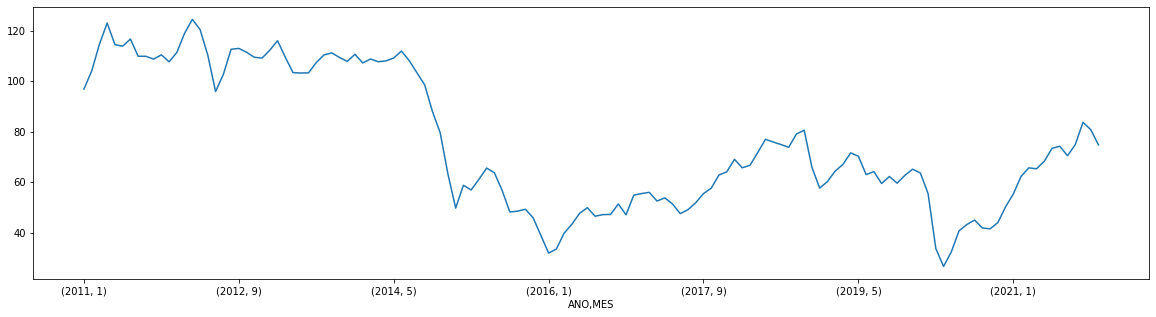

In [425]:
dfPeroGroup['Último'].plot(figsize=(20,5))

<AxesSubplot:xlabel='year,month'>

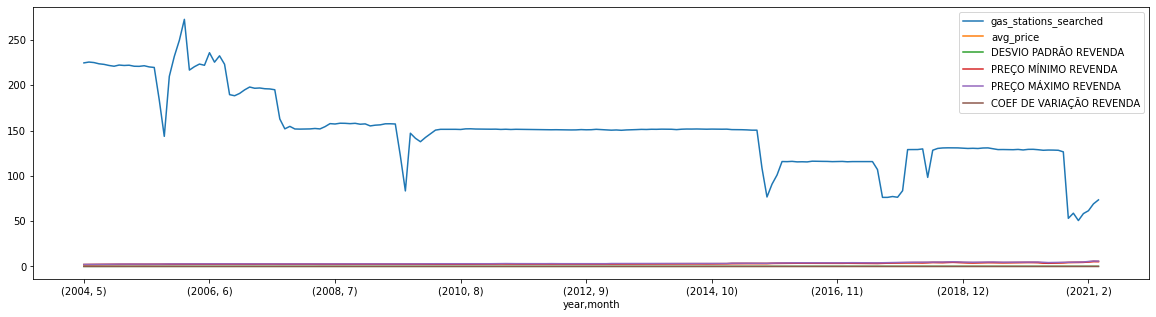

In [426]:
df_gas_centro_oeste_gp  .plot(figsize=(20,5))

<AxesSubplot:xlabel='year,month,region'>

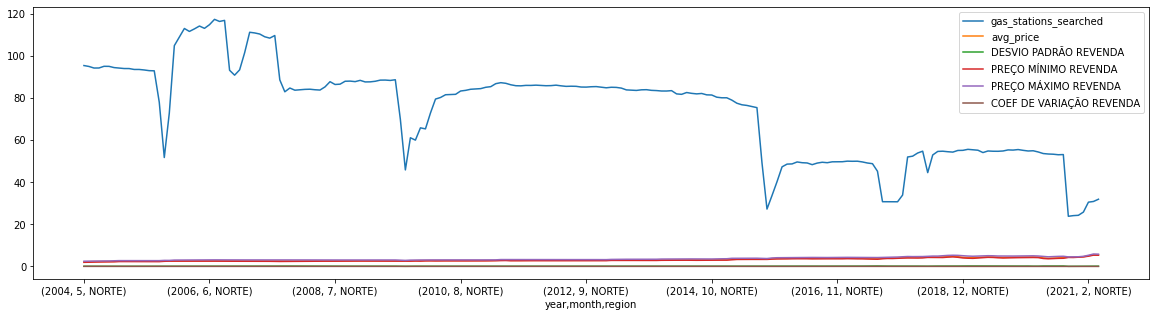

In [427]:
df_gas_norte_gp.plot(figsize=(20,5))

<AxesSubplot:xlabel='year,month,region'>

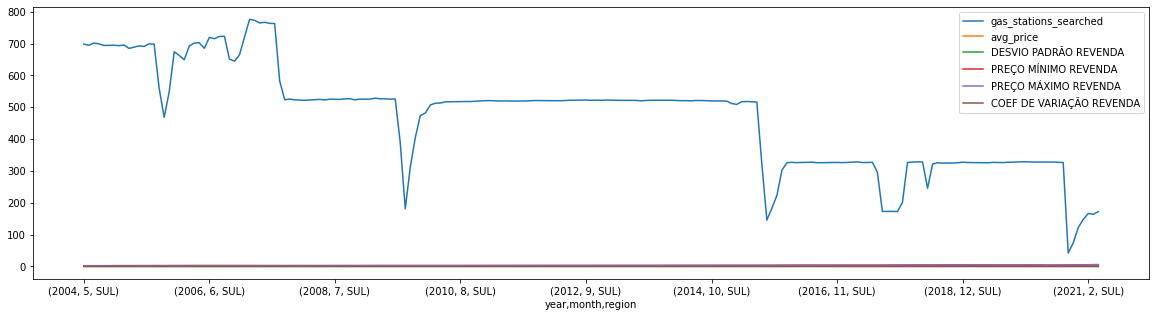

In [428]:
df_gas_sul_gp.plot(figsize=(20,5))

<AxesSubplot:xlabel='year,month,region'>

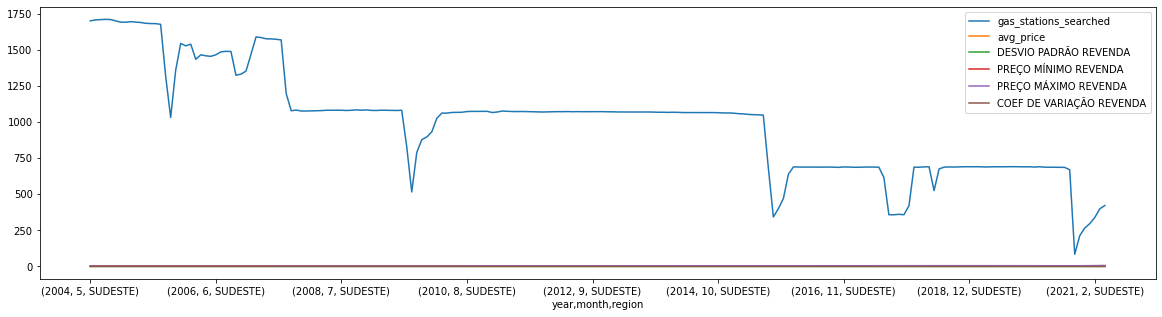

In [429]:
df_Gas_sudeste_gp.plot(figsize=(20,5))